In [55]:
import pandas as pd
import numpy as np

In [56]:
from google.colab import files
x= files.upload()


Saving AP-PowerSupplyPosition_2012-05-02_to_2023-05-14.csv to AP-PowerSupplyPosition_2012-05-02_to_2023-05-14 (1).csv


In [57]:
dset= pd.read_csv("AP-PowerSupplyPosition_2012-05-02_to_2023-05-14.csv", encoding='iso-8859-1')
dset.head()

,Date,Energy Required (MU),Energy Met (MU),Energy +/- (MU),Genco Thermal,Genco Hydel,Genco Total,CGS and Purchases,IPPS (GAS),NCEs & Others,AP Share of TGISTS,Grand Total,Reversible Pump Consumption,Unrestricted Peak Demand (MW),Deficit/Surplus (MW)
0,02-May-2012,255.639,241.185,-14.454,103.643,5.276,108.919,77.106,42.752,12.408,0.0,241.185,0.0,12099,-1000.0
1,03-May-2012,258.470,243.370,-15.100,106.255,3.748,110.003,79.273,41.374,12.720,0.0,243.370,0.0,12219,-1500.0
2,04-May-2012,261.393,247.449,-13.944,106.153,6.527,112.680,82.753,39.385,12.631,0.0,247.449,0.0,11693,-1000.0
3,05-May-2012,252.866,237.919,-14.947,95.295,5.334,100.629,85.987,39.256,12.047,0.0,237.919,0.0,11636,-1000.0
4,06-May-2012,250.566,236.528,-14.038,95.862,4.494,100.356,86.762,38.017,11.393,0.0,236.528,0.0,11133,-700.0


In [58]:
dset.dtypes

Date                              object
Energy Required (MU)             float64
Energy Met (MU)                  float64
Energy +/- (MU)                  float64
Genco Thermal                    float64
Genco Hydel                      float64
Genco Total                      float64
CGS and Purchases                float64
IPPS (GAS)                       float64
NCEs & Others                    float64
AP Share of TGISTS               float64
Grand Total                      float64
Reversible Pump Consumption      float64
Unrestricted Peak Demand (MW)     object
Deficit/Surplus (MW)             float64
dtype: object

<h1>Deficit/Surplus(MW) is the target variable </h1>

In [59]:
dset['Deficit/Surplus (MW)'].value_counts()

 0.0       3133
-2000.0      99
-1500.0      48
-1000.0      41
-2500.0      39
           ... 
-1350.0       1
-1650.0       1
-1632.0       1
-1040.0       1
-175.0        1
Name: Deficit/Surplus (MW), Length: 139, dtype: int64

In [60]:
dset.tail()

,Date,Energy Required (MU),Energy Met (MU),Energy +/- (MU),Genco Thermal,Genco Hydel,Genco Total,CGS and Purchases,IPPS (GAS),NCEs & Others,AP Share of TGISTS,Grand Total,Reversible Pump Consumption,Unrestricted Peak Demand (MW),Deficit/Surplus (MW)
3938,14-May-2023,226.349,226.349,0.000,92.368,4.708,97.076,28.039,0.000,107.001,-5.767,226.349,0.000,10653,0.0
3939,Total,731865.506,707227.447,-24634.761,260370.621,40106.698,300477.319,209838.767,52076.798,172324.775,-27310.436,707407.223,179.776,*14590 (04-Apr-2014),NaN
3940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3941,* The highest Peak Demand during the selected ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
dset.rename(columns = {'Deficit/Surplus (MW)':'Deficit_Surplus (MW)'}, inplace = True)

In [62]:
print(dset.shape)

(3943, 15)


In [63]:
dset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3943 entries, 0 to 3942
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           3941 non-null   object 
 1   Energy Required (MU)           3940 non-null   float64
 2   Energy Met (MU)                3940 non-null   float64
 3   Energy +/- (MU)                3940 non-null   float64
 4   Genco Thermal                  3940 non-null   float64
 5   Genco Hydel                    3940 non-null   float64
 6   Genco Total                    3940 non-null   float64
 7   CGS and Purchases              3940 non-null   float64
 8   IPPS (GAS)                     3940 non-null   float64
 9   NCEs & Others                  3940 non-null   float64
 10  AP Share of TGISTS             3940 non-null   float64
 11  Grand Total                    3940 non-null   float64
 12  Reversible Pump Consumption    3940 non-null   f

In [64]:
dset.isnull().sum()

Date                             2
Energy Required (MU)             3
Energy Met (MU)                  3
Energy +/- (MU)                  3
Genco Thermal                    3
Genco Hydel                      3
Genco Total                      3
CGS and Purchases                3
IPPS (GAS)                       3
NCEs & Others                    3
AP Share of TGISTS               3
Grand Total                      3
Reversible Pump Consumption      3
Unrestricted Peak Demand (MW)    3
Deficit_Surplus (MW)             4
dtype: int64

<h1> Clear the Null Values </h1>

In [65]:
dset.dropna(subset=['Energy Required (MU)'], inplace=True)

In [66]:
dset.dropna(subset=['Deficit_Surplus (MW)'], inplace=True)

In [67]:
dset.isnull().sum()

Date                             0
Energy Required (MU)             0
Energy Met (MU)                  0
Energy +/- (MU)                  0
Genco Thermal                    0
Genco Hydel                      0
Genco Total                      0
CGS and Purchases                0
IPPS (GAS)                       0
NCEs & Others                    0
AP Share of TGISTS               0
Grand Total                      0
Reversible Pump Consumption      0
Unrestricted Peak Demand (MW)    0
Deficit_Surplus (MW)             0
dtype: int64

In [68]:
dset.describe()

,Energy Required (MU),Energy Met (MU),Energy +/- (MU),Genco Thermal,Genco Hydel,Genco Total,CGS and Purchases,IPPS (GAS),NCEs & Others,AP Share of TGISTS,Grand Total,Reversible Pump Consumption,Deficit_Surplus (MW)
count,3939.000000,3939.000000,3939.000000,3939.000000,3939.000000,3939.000000,3939.000000,3939.000000,3939.000000,3939.000000,3939.000000,3939.000000,3939.000000
mean,185.799824,179.544922,-6.254065,66.100691,10.181949,76.282640,53.272091,13.220817,43.748356,-6.933342,179.590562,0.045640,-277.399848
std,47.048485,36.877052,15.473587,18.785745,8.154817,20.373629,30.440018,7.650374,31.453857,9.824229,36.960165,0.467394,683.802268
min,0.000000,0.000000,-85.885000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-67.202000,0.000000,0.000000,-4000.000000
25%,151.784500,151.701000,0.000000,53.087500,5.746500,62.193000,31.414500,7.754500,13.162000,-14.766000,151.701000,0.000000,0.000000
50%,171.603000,171.603000,0.000000,64.492000,7.710000,74.549000,42.131000,12.867000,44.227000,-1.678000,171.603000,0.000000,0.000000
75%,207.976500,205.059500,0.000000,78.893500,11.626500,88.495500,71.292500,17.983500,69.859000,-0.403000,205.059500,0.000000,0.000000
max,320.284000,284.778000,1.578000,109.729000,69.030000,150.161000,146.229000,45.683000,124.395000,1.873000,284.778000,9.850000,500.000000


<Axes: >

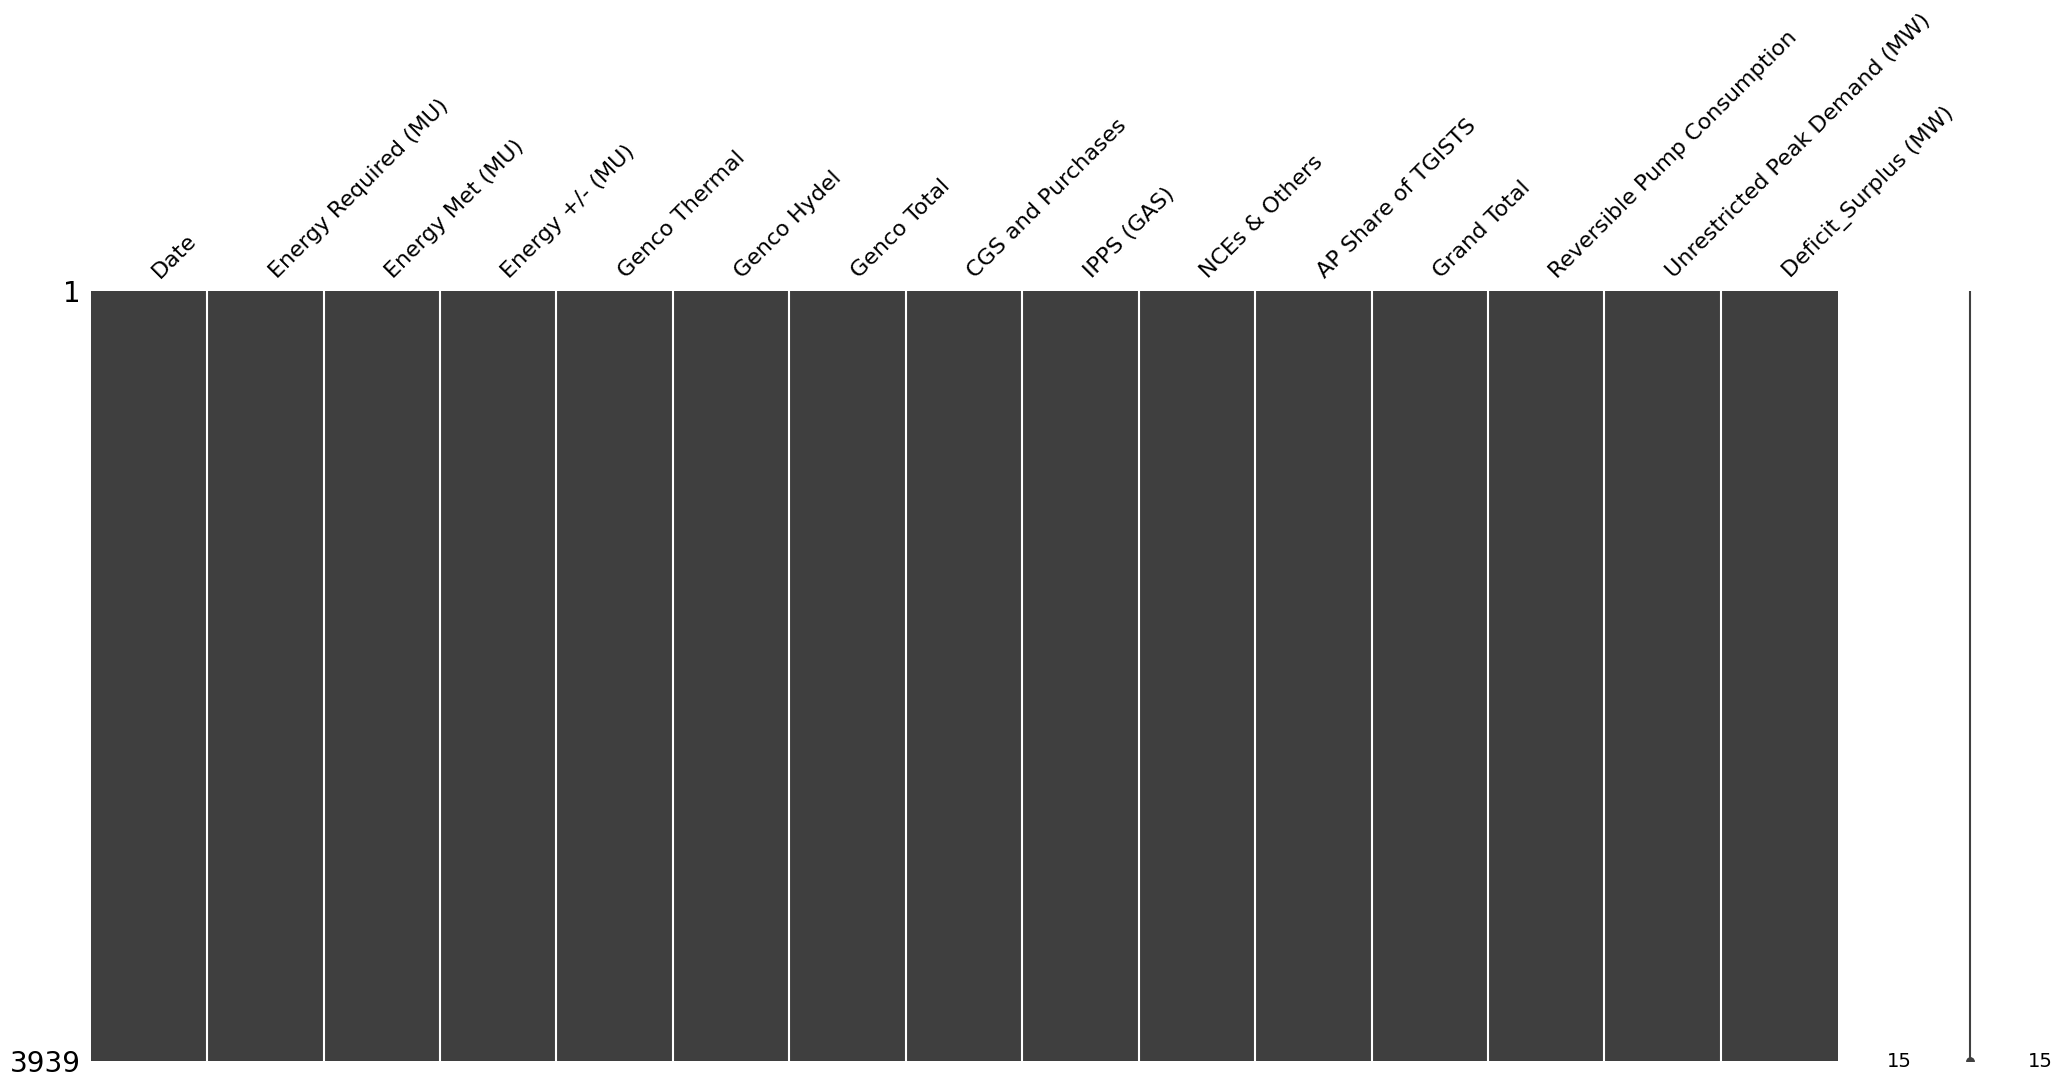

In [69]:
import missingno as mo
mo.matrix(dset)

In [70]:
print(dset.columns[dset.isna().any()])

Index([], dtype='object')


In [71]:
dset.isnull().sum().sum()

0

In [72]:
dset.count()['Energy Required (MU)']

3939

<H1> EDA </H1>

In [73]:
dset["Energy Met (MU)"].value_counts()

163.519    2
160.416    2
183.849    2
157.015    2
165.116    2
          ..
120.311    1
126.592    1
127.068    1
126.851    1
226.349    1
Name: Energy Met (MU), Length: 3882, dtype: int64

In [74]:
import plotly.express as px
ptran= px.histogram(dset, x = 'Energy Met (MU)',  title="Energy Met")
ptran.show()

In [75]:
dset["CGS and Purchases"].value_counts()

0.000     56
27.164     3
22.648     2
30.374     2
27.593     2
          ..
57.273     1
46.604     1
46.829     1
61.820     1
28.039     1
Name: CGS and Purchases, Length: 3769, dtype: int64

In [76]:
import plotly.express as px
ptran= px.histogram(dset, x = 'CGS and Purchases',  title="CGS and Purchases")
ptran.show()

In [77]:
nof= px.histogram(dset, x='Energy Met (MU)', color="Deficit_Surplus (MW)", title="Energy Met / Deficit'Surplus ")
nof.show()

<h1> Here, MU means Million units </h1>

In [78]:
nof= px.histogram(dset, x='CGS and Purchases', color="Deficit_Surplus (MW)", title="Purchases / Deficit'Surplus ")
nof.show()

In [79]:
print("Count of cases:", dset['Deficit_Surplus (MW)'].value_counts())

Count of cases:  0.0       3133
-2000.0      99
-1500.0      48
-1000.0      41
-2500.0      39
           ... 
-1350.0       1
-1650.0       1
-1632.0       1
-1040.0       1
-175.0        1
Name: Deficit_Surplus (MW), Length: 139, dtype: int64


<h1> Here I'm finding the categorical columns </h1>

In [80]:
categorical_values = []
for i in dset.columns:
    if dset[i].dtype == "object":
        categorical_values.append(i)

print("Categorical columns :", categorical_values)

Categorical columns : ['Date', 'Unrestricted Peak Demand (MW)']


In [81]:
from sklearn import preprocessing
le= preprocessing.LabelEncoder()

In [82]:
for i in categorical_values:
    dset[i] = le.fit_transform(dset[i])

In [83]:
dset.head()

,Date,Energy Required (MU),Energy Met (MU),Energy +/- (MU),Genco Thermal,Genco Hydel,Genco Total,CGS and Purchases,IPPS (GAS),NCEs & Others,AP Share of TGISTS,Grand Total,Reversible Pump Consumption,Unrestricted Peak Demand (MW),Deficit_Surplus (MW)
0,215,255.639,241.185,-14.454,103.643,5.276,108.919,77.106,42.752,12.408,0.0,241.185,0.0,596,-1000.0
1,347,258.470,243.370,-15.100,106.255,3.748,110.003,79.273,41.374,12.720,0.0,243.370,0.0,629,-1500.0
2,478,261.393,247.449,-13.944,106.153,6.527,112.680,82.753,39.385,12.631,0.0,247.449,0.0,498,-1000.0
3,608,252.866,237.919,-14.947,95.295,5.334,100.629,85.987,39.256,12.047,0.0,237.919,0.0,479,-1000.0
4,740,250.566,236.528,-14.038,95.862,4.494,100.356,86.762,38.017,11.393,0.0,236.528,0.0,298,-700.0


In [84]:
X = dset.drop('Deficit_Surplus (MW)', axis='columns')
Y = dset['Deficit_Surplus (MW)']

In [85]:
#feature selection using stats Model
import statsmodels.api as sm
X= sm.add_constant(X)

In [86]:
lr = sm.OLS(Y, X).fit()
print(lr.summary2())

                        Results: Ordinary least squares
Model:                 OLS                     Adj. R-squared:        0.979     
Dependent Variable:    Deficit_Surplus (MW)    AIC:                   47486.7240
Date:                  2023-10-23 17:34        BIC:                   47562.0682
No. Observations:      3939                    Log-Likelihood:        -23731.   
Df Model:              11                      F-statistic:           1.631e+04 
Df Residuals:          3927                    Prob (F-statistic):    0.00      
R-squared:             0.979                   Scale:                 10043.    
--------------------------------------------------------------------------------
                               Coef.   Std.Err.    t    P>|t|    [0.025   0.975]
--------------------------------------------------------------------------------
const                          28.2191  13.1474  2.1464 0.0319    2.4428 53.9954
Date                            0.0011   0.0014  0.80

In [87]:
p_values= lr.pvalues
cols= p_values[p_values<=0.05].index.tolist()
print(cols)

['const', 'Unrestricted Peak Demand (MW)']


In [88]:
X= X[cols[1:]]
X.head()

,Unrestricted Peak Demand (MW)
0,596
1,629
2,498
3,479
4,298


In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,  random_state = 42)

In [90]:
## checking for the distribution of target variable in train test split
print('Distribution of target variable in training dataset')
print(Y_train.value_counts())

print('Distribution of target variable in test dataset')
print(Y_test.value_counts())

Distribution of target variable in training dataset
 0.0       2515
-2000.0      75
-1500.0      35
-2500.0      33
-1000.0      29
           ... 
-19.0         1
-238.0        1
-101.0        1
-2330.0       1
-510.0        1
Name: Deficit_Surplus (MW), Length: 116, dtype: int64
Distribution of target variable in test dataset
 0.0       618
-2000.0     24
-1500.0     13
-1000.0     12
-2400.0      7
          ... 
-24.0        1
-2600.0      1
-430.0       1
-2900.0      1
-250.0       1
Name: Deficit_Surplus (MW), Length: 65, dtype: int64


<h1>Data Normalization </h1>

In [91]:
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

<h1> Decision Tree</h1>

In [92]:
from sklearn.tree import DecisionTreeClassifier

# create an instance of the DecisionTreeClassifier class
clf= DecisionTreeClassifier(max_depth= 4,random_state= 42)
clf.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [93]:
predY= clf.predict(X_test)
"""### *Accuracy Score*"""

from sklearn.metrics import accuracy_score,f1_score
print("Model Accuracy: {0}%".format(accuracy_score(Y_test, predY)))
print("f1_score ",f1_score(Y_test, predY,average='weighted'))
recall_LR=metrics.recall_score(final_model_pred_LR.Actual, final_model_pred_LR.predictions,average='micro' )
print('recall',recall_LR)
Precision_LR=metrics.precision_score(final_model_pred_LR.Actual, final_model_pred_LR.predictions,average='micro' )
print('Precision',Precision_LR)

Model Accuracy: 0.7982233502538071%
f1_score  0.7261280672820865
recall 0.7842639593908629
Precision 0.7842639593908629


<h1> Random Forest </h1>

In [94]:
from sklearn.ensemble import RandomForestClassifier

# create an instance of the DecisionTreeClassifier class
clf_RF= RandomForestClassifier(n_estimators=100, max_depth=4)
clf_RF.fit(X_train,Y_train)

RandomForestClassifier(max_depth=4)

In [95]:
predY= clf_RF.predict(X_test)
"""### *Accuracy Score*"""

from sklearn.metrics import accuracy_score,f1_score
print("Model Accuracy: {0}%".format(accuracy_score(Y_test, predY)))
print("f1_score ",f1_score(Y_test, predY,average='weighted'))
recall_LR=metrics.recall_score(final_model_pred_LR.Actual, final_model_pred_LR.predictions,average='micro' )
print('recall',recall_LR)
Precision_LR=metrics.precision_score(final_model_pred_LR.Actual, final_model_pred_LR.predictions,average='micro' )
print('Precision',Precision_LR)

Model Accuracy: 0.7969543147208121%
f1_score  0.7278283028891932
recall 0.7842639593908629
Precision 0.7842639593908629


<h1> Logistic Regression </h1>

In [96]:
from sklearn.linear_model import LogisticRegression
logmodel= LogisticRegression()
logmodel.fit(X_train, Y_train)

LogisticRegression()

In [97]:
pred_LR= logmodel.predict(X_test)
final_model_pred_LR = pd.DataFrame({'Actual':Y_test, 'predictions':pred_LR})

In [98]:
from sklearn.metrics import classification_report,confusion_matrix
import sklearn.metrics as metrics

In [99]:
predY= clf_RF.predict(X_test)
"""### *Accuracy Score*"""

from sklearn.metrics import accuracy_score,f1_score
print("Model Accuracy: {0}%".format(accuracy_score(Y_test, predY)))
print("f1_score ",f1_score(Y_test, predY,average='weighted'))
recall_LR=metrics.recall_score(final_model_pred_LR.Actual, final_model_pred_LR.predictions,average='micro' )
print('recall',recall_LR)
Precision_LR=metrics.precision_score(final_model_pred_LR.Actual, final_model_pred_LR.predictions,average='micro' )
print('Precision',Precision_LR)

Model Accuracy: 0.7969543147208121%
f1_score  0.7278283028891932
recall 0.7842639593908629
Precision 0.7842639593908629
